Step 1: Importing Python libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Importing Customed Stock Dataset

In [2]:
path = r'/Users/matthewabrams/Desktop/Stocks Data/'
stocks = pd.read_csv(os.path.join(path, 'Stock Datasets/New Files/6_Stocks_Transformed.csv'), index_col = False)
stocks.drop(columns = 'Unnamed: 0', inplace = True)
stocks

,Date,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
0,2014-09-22,Amazon,62189780,16.2250,16.4245,16.4745,16.4745,NaN,NaN
1,2014-09-23,Amazon,46972460,16.1815,16.1230,16.3800,16.3800,NaN,NaN
2,2014-09-24,Amazon,52802720,16.4105,16.2085,16.4720,16.4720,NaN,NaN
3,2014-09-25,Amazon,58573060,16.0965,16.3995,16.4270,16.4270,NaN,NaN
4,2014-09-26,Amazon,72707740,16.1605,16.0300,16.1750,16.1750,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15097,2024-09-16,Tesla,54323000,226.7800,229.3000,229.9600,223.5300,198.474590,214.813616
15098,2024-09-17,Tesla,66761640,227.8700,229.4500,234.5700,226.5533,198.339781,214.910301
15099,2024-09-18,Tesla,78010200,227.2000,230.0900,235.6800,226.8800,198.179071,215.024493
15100,2024-09-19,Tesla,102694600,243.9200,234.0000,244.2400,232.1300,198.083333,215.185753


Step 3: Descriptive Stats

In [3]:
stocks.describe()

,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
count,1.510200e+04,15102.000000,15102.000000,15102.000000,15102.000000,14010.000000,12918.000000
mean,6.208461e+07,165.619393,165.579315,167.835907,163.983633,162.957166,161.779613
std,6.332448e+07,137.459438,137.466141,139.341713,135.354645,126.891039,119.345458
min,1.143952e+06,9.578000,9.488000,10.331300,9.403300,14.051845,14.458877
25%,1.843786e+07,52.481875,52.532200,53.282500,52.333400,55.218484,59.929593
50%,4.278853e+07,136.375000,136.395000,137.760000,135.940000,139.620779,140.185514
75%,8.621070e+07,228.877500,229.022500,233.191600,225.766650,232.549372,235.357670
max,9.140809e+08,706.910000,707.550000,715.660000,698.370000,616.125027,542.559205


In [4]:
stocks.groupby('Stock_Name').describe().transpose()

Stock_Name                   Amazon         Apple          Meta     Microsoft  \
Volume          count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   7.717535e+07  1.214003e+08  2.339778e+07  2.911809e+07   
                std    4.058933e+07  6.946367e+07  1.503568e+07  1.329843e+07   
                min    1.762674e+07  2.404834e+07  5.467488e+06  7.425603e+06   
                25%    5.173818e+07  7.432864e+07  1.478159e+07  2.089700e+07   
                50%    6.633204e+07  1.034580e+08  1.958383e+07  2.605788e+07   
                75%    9.059192e+07  1.477512e+08  2.707510e+07  3.342207e+07   
                max    4.769344e+08  6.475300e+08  2.323166e+08  1.691150e+08   
Close/Last in $ count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   9.597680e+01  9.055114e+01  2.080438e+02  1.770931e+02   
                std    5.305890e+01  6.181150e+01  1.073389e+02  1.181266e+02   
                min    1.434750e+01  2.258500e+01  7.263000e+01  4.029000e+01   
                25%    4.272950e+01  3.517250e+01  1.296900e+02  6.499000e+01   
                50%    9.236650e+01  5.623750e+01  1.795100e+02  1.384300e+02   
                75%    1.475975e+02  1.487600e+02  2.684000e+02  2.695000e+02   
                max    2.000000e+02  2.348200e+02  5.613500e+02  4.675600e+02   
Open in $       count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   9.600390e+01  9.047896e+01  2.079186e+02  1.770481e+02   
                std    5.309713e+01  6.175879e+01  1.072848e+02  1.181232e+02   
                min    1.422000e+01  2.250000e+01  7.079000e+01  4.034000e+01   
                25%    4.276500e+01  3.522750e+01  1.292100e+02  6.511000e+01   
                50%    9.243500e+01  5.641000e+01  1.792600e+02  1.389700e+02   
                75%    1.475800e+02  1.485350e+02  2.689300e+02  2.688650e+02   
                max    2.000900e+02  2.364800e+02  5.600000e+02  4.670000e+02   
High in $       count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   9.710068e+01  9.145312e+01  2.106060e+02  1.787474e+02   
                std    5.371572e+01  6.242427e+01  1.087111e+02  1.191792e+02   
                min    1.452100e+01  2.291750e+01  7.335000e+01  4.074000e+01   
                25%    4.289900e+01  3.539610e+01  1.306600e+02  6.545000e+01   
                50%    9.348850e+01  5.694750e+01  1.810000e+02  1.399900e+02   
                75%    1.496750e+02  1.499692e+02  2.724400e+02  2.731300e+02   
                max    2.012000e+02  2.372300e+02  5.645000e+02  4.683500e+02   
Low in $        count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   9.710068e+01  9.145312e+01  2.053483e+02  1.752662e+02   
                std    5.371572e+01  6.242427e+01  1.059133e+02  1.169568e+02   
                min    1.452100e+01  2.291750e+01  7.032000e+01  3.972000e+01   
                25%    4.289900e+01  3.539610e+01  1.282300e+02  6.475000e+01   
                50%    9.348850e+01  5.694750e+01  1.776700e+02  1.370000e+02   
                75%    1.496750e+02  1.499692e+02  2.653300e+02  2.661800e+02   
                max    2.012000e+02  2.372300e+02  5.563001e+02  4.644600e+02   
MA_Six_Months   count  2.335000e+03  2.335000e+03  2.335000e+03  2.335000e+03   
                mean   9.575544e+01  8.848476e+01  2.018404e+02  1.725987e+02   
                std    4.861439e+01  5.774501e+01  8.563832e+01  1.079406e+02   
                min    1.769798e+01  2.526232e+01  7.839008e+01  4.463328e+01   
                25%    4.654429e+01  3.660400e+01  1.468467e+02  6.901199e+01   
                50%    9.151129e+01  5.850662e+01  1.785284e+02  1.423578e+02   
                75%    1.404370e+02  1.503096e+02  2.583577e+02  2.662695e+02   
                max    1.772629e+02  1.964843e+02  4.793210e+02  4.177578e+02   
MA_One_Year     count  2.153000

Step 4: Prepping for Visualizations

In [5]:
# Grabbing today's date
max_date = max(stocks['Date'])
max_date

'2024-09-20'

In [6]:
# Filtering the dataset by using today's date
stocks_max_date = stocks[stocks['Date']==max_date]
stocks_max_date

,Date,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
2516,2024-09-20,Amazon,100378600,191.60,190.23,191.8400,191.8400,177.262923,153.776877
5033,2024-09-20,Apple,318679900,228.20,229.97,233.0900,233.0900,196.484262,188.851808
7550,2024-09-20,Meta,22066820,561.35,560.00,564.5000,556.3001,479.320956,386.544986
10067,2024-09-20,Microsoft,55167110,435.27,437.22,439.2400,434.2200,417.757760,376.182699
12584,2024-09-20,Netflix,3998062,701.03,705.55,706.6732,696.3100,616.125027,513.951671
15101,2024-09-20,Tesla,99879070,238.25,241.52,243.9900,235.9200,198.001749,215.332986


Text(0.5, 1.0, 'Shares Traded per Stock For Today')

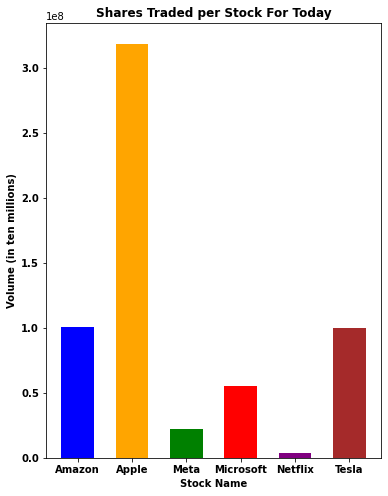

In [7]:
shares_volume = plt.figure(figsize=(6,8))
colors = ['blue','orange','green','red','purple','brown']
plt.bar(stocks_max_date['Stock_Name'], stocks_max_date['Volume'],
        color = colors, width = 0.6),
plt.xlabel('Stock Name', fontsize = 10, fontweight = 'bold')
plt.ylabel('Volume (in ten millions)', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, rotation = 0, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.title('Shares Traded per Stock For Today', fontsize = 12, fontweight = 'bold')

In [8]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks.set_index('Date')
stocks

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2014-09-22,Amazon,62189780,16.2250,16.4245,16.4745,16.4745,NaN,NaN
2014-09-23,Amazon,46972460,16.1815,16.1230,16.3800,16.3800,NaN,NaN
2014-09-24,Amazon,52802720,16.4105,16.2085,16.4720,16.4720,NaN,NaN
2014-09-25,Amazon,58573060,16.0965,16.3995,16.4270,16.4270,NaN,NaN
2014-09-26,Amazon,72707740,16.1605,16.0300,16.1750,16.1750,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-09-16,Tesla,54323000,226.7800,229.3000,229.9600,223.5300,198.474590,214.813616
2024-09-17,Tesla,66761640,227.8700,229.4500,234.5700,226.5533,198.339781,214.910301
2024-09-18,Tesla,78010200,227.2000,230.0900,235.6800,226.8800,198.179071,215.024493


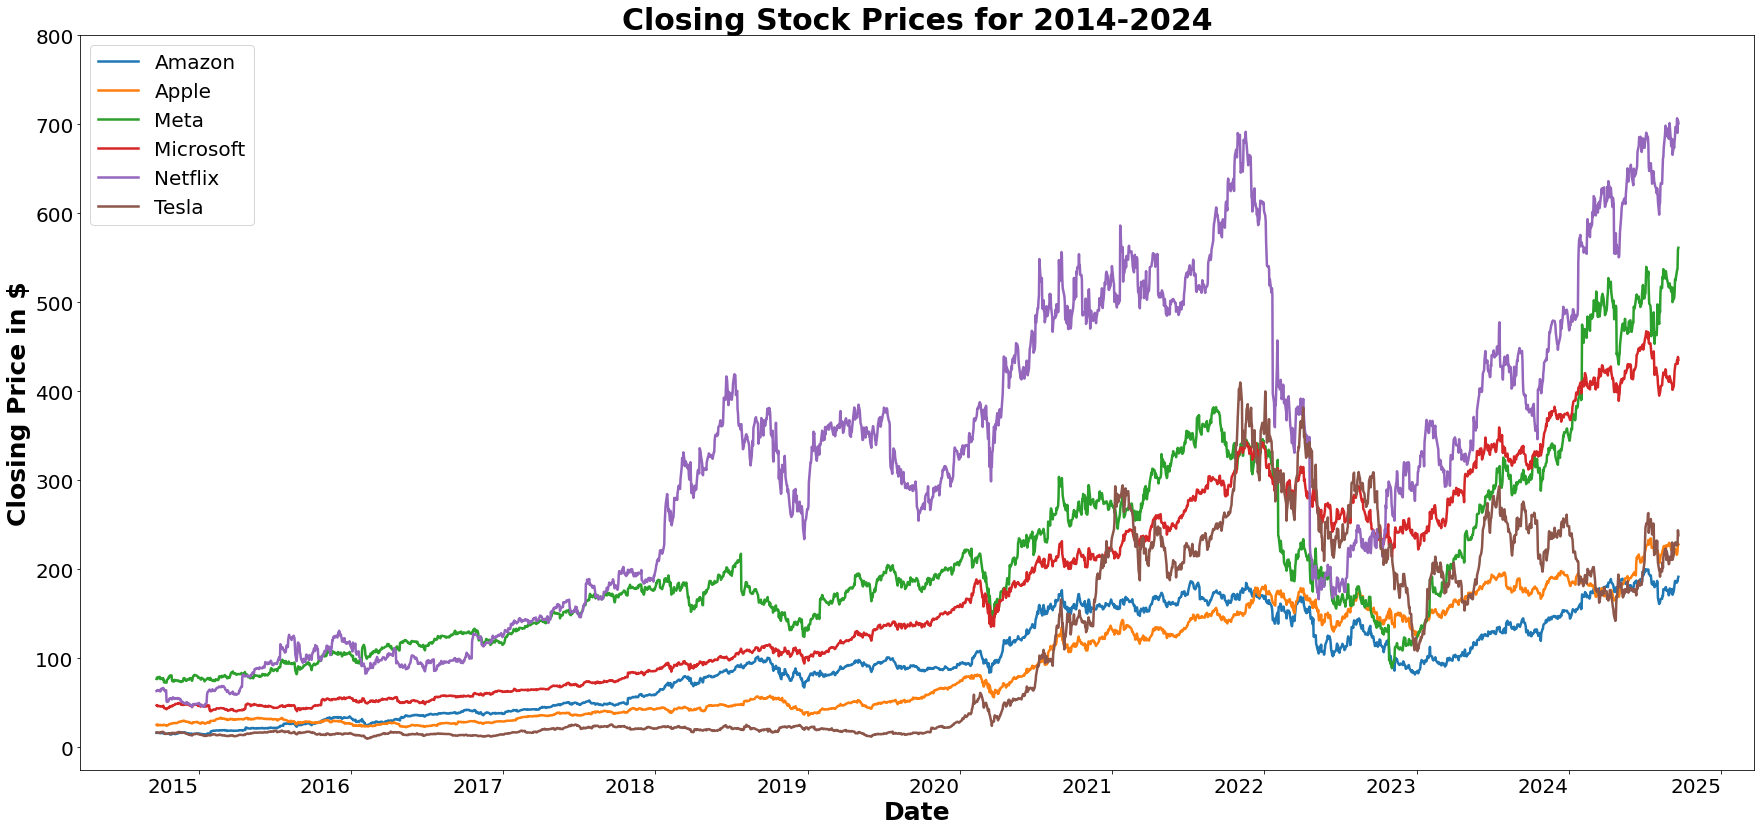

In [9]:
#Using a line chart to graph closing price of stocks within a 10 year frame
six_stocks_ten_years = plt.figure(figsize=(30,15))
stocks.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5)
plt.title('Closing Stock Prices for 2014-2024', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 900, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

In [10]:
# Breaking dataset into multiple where each one is assigned to one specific stock, prepping for moving average analysis

In [11]:
moving_average = stocks[stocks['MA_One_Year'].notna()]
moving_average

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-03-03,Amazon,54755260,28.8745,28.8980,28.9933,28.9933,27.902462,22.803793
2016-03-04,Amazon,68274840,28.7570,29.0535,29.0700,29.0700,27.942139,22.838127
2016-03-07,Amazon,98570380,28.1400,28.6770,28.6815,28.6815,27.980153,22.870890
2016-03-08,Amazon,94543020,28.0130,27.8935,28.5675,28.5675,28.016492,22.902678
2016-03-09,Amazon,87496500,27.9735,27.9780,28.0175,28.0175,28.052464,22.935217
...,...,...,...,...,...,...,...,...
2024-09-16,Tesla,54323000,226.7800,229.3000,229.9600,223.5300,198.474590,214.813616
2024-09-17,Tesla,66761640,227.8700,229.4500,234.5700,226.5533,198.339781,214.910301
2024-09-18,Tesla,78010200,227.2000,230.0900,235.6800,226.8800,198.179071,215.024493


In [12]:
moving_average_amazon_stock = moving_average[moving_average['Stock_Name']=='Amazon']
moving_average_amazon_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-03-03,Amazon,54755260,28.8745,28.8980,28.9933,28.9933,27.902462,22.803793
2016-03-04,Amazon,68274840,28.7570,29.0535,29.0700,29.0700,27.942139,22.838127
2016-03-07,Amazon,98570380,28.1400,28.6770,28.6815,28.6815,27.980153,22.870890
2016-03-08,Amazon,94543020,28.0130,27.8935,28.5675,28.5675,28.016492,22.902678
2016-03-09,Amazon,87496500,27.9735,27.9780,28.0175,28.0175,28.052464,22.935217
...,...,...,...,...,...,...,...,...
2024-09-16,Amazon,26065490,184.8900,185.2900,185.8100,185.8100,176.491175,152.830301
2024-09-17,Amazon,26091680,186.8800,186.8500,189.4500,189.4500,176.674016,153.057507
2024-09-18,Amazon,34448130,186.4300,186.4500,188.8000,188.8000,176.854454,153.291288


In [13]:
moving_average_apple_stock = moving_average[moving_average['Stock_Name']=='Apple']
moving_average_apple_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-03-03,Apple,147537960,25.3750,25.1450,25.4275,25.4275,28.088606,28.772178
2016-03-04,Apple,184106400,25.7525,25.5925,25.9375,25.9375,28.055601,28.773513
2016-03-07,Apple,143562960,25.4675,25.5975,25.7075,25.7075,28.021379,28.772986
2016-03-08,Apple,126154840,25.2575,25.1950,25.4400,25.4400,27.985081,28.772493
2016-03-09,Apple,108594120,25.2800,25.3275,25.3950,25.3950,27.949316,28.774719
...,...,...,...,...,...,...,...,...
2024-09-16,Apple,59357430,216.3200,216.5400,217.2200,217.2200,195.822131,188.198466
2024-09-17,Apple,45519340,216.7900,215.7500,216.9000,216.9000,195.948852,188.338630
2024-09-18,Apple,59894930,220.6900,217.5500,222.7100,222.7100,196.099891,188.494603


In [14]:
moving_average_meta_stock = moving_average[moving_average['Stock_Name']=='Meta']
moving_average_meta_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-03-03,Meta,21337720,109.580,110.250,110.30,108.5400,97.679617,88.052671
2016-03-04,Meta,24908230,108.390,110.050,110.05,107.9300,97.826393,88.139219
2016-03-07,Meta,31487180,105.730,108.070,108.07,104.7200,97.963115,88.214397
2016-03-08,Meta,25582660,105.930,104.780,107.37,104.4000,98.099016,88.289452
2016-03-09,Meta,20458320,107.510,106.700,107.51,105.4900,98.239563,88.372438
...,...,...,...,...,...,...,...,...
2024-09-16,Meta,9527646,533.280,524.540,534.10,517.4000,475.111421,382.880151
2024-09-17,Meta,11690780,536.315,537.600,542.10,530.5700,476.111011,383.761233
2024-09-18,Meta,10323540,537.950,537.065,544.20,533.9026,477.111667,384.655671


In [15]:
moving_average_microsoft_stock = moving_average[moving_average['Stock_Name']=='Microsoft']
moving_average_microsoft_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-03-03,Microsoft,24423260,52.35,52.970,52.97,51.780,49.268497,47.350795
2016-03-04,Microsoft,33033010,52.03,52.400,52.45,51.710,49.301612,47.364411
2016-03-07,Microsoft,38426220,51.03,51.560,51.80,50.580,49.331967,47.376658
2016-03-08,Microsoft,33822940,51.65,50.800,52.13,50.595,49.363770,47.389178
2016-03-09,Microsoft,28238270,52.84,51.890,52.85,51.855,49.401311,47.407808
...,...,...,...,...,...,...,...,...
2024-09-16,Microsoft,13834700,431.34,430.600,433.53,428.220,416.439016,374.573356
2024-09-17,Microsoft,18874230,435.15,440.230,441.85,432.270,416.770000,374.978753
2024-09-18,Microsoft,18898040,430.81,435.000,436.03,430.410,417.076831,375.380041


In [16]:
moving_average_netflix_stock = moving_average[moving_average['Stock_Name']=='Netflix']
moving_average_netflix_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-03-03,Netflix,15308950,97.93,97.83,98.3500,95.3900,106.628489,85.309052
2016-03-04,Netflix,23404360,101.58,98.76,102.2200,98.3200,106.667623,85.414054
2016-03-07,Netflix,23875100,95.49,101.00,101.7900,95.2500,106.678872,85.501933
2016-03-08,Netflix,14773970,96.23,95.00,98.2800,94.5000,106.684103,85.589232
2016-03-09,Netflix,12281550,98.00,96.82,98.3700,95.0000,106.704478,85.684148
...,...,...,...,...,...,...,...,...
2024-09-16,Netflix,1843745,696.50,700.00,703.0200,688.6316,611.521311,510.019315
2024-09-17,Netflix,2298630,706.91,700.82,707.6300,698.3700,612.724317,511.006055
2024-09-18,Netflix,2984411,690.47,707.55,707.5500,688.0000,613.813279,511.959808


In [17]:
moving_average_tesla_stock = moving_average[moving_average['Stock_Name']=='Tesla']
moving_average_tesla_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-03-03,Tesla,72344859,13.0493,12.5520,13.1613,12.2813,15.273267,15.078859
2016-03-04,Tesla,97197821,13.4027,13.2000,13.6020,13.1667,15.255180,15.069912
2016-03-07,Tesla,79966415,13.6860,13.1787,13.9800,13.1600,15.238754,15.061670
2016-03-08,Tesla,62632439,13.5067,13.5667,13.8333,13.4800,15.220349,15.052622
2016-03-09,Tesla,48113931,13.9147,13.6347,13.9582,13.5193,15.201519,15.045640
...,...,...,...,...,...,...,...,...
2024-09-16,Tesla,54323000,226.7800,229.3000,229.9600,223.5300,198.474590,214.813616
2024-09-17,Tesla,66761640,227.8700,229.4500,234.5700,226.5533,198.339781,214.910301
2024-09-18,Tesla,78010200,227.2000,230.0900,235.6800,226.8800,198.179071,215.024493


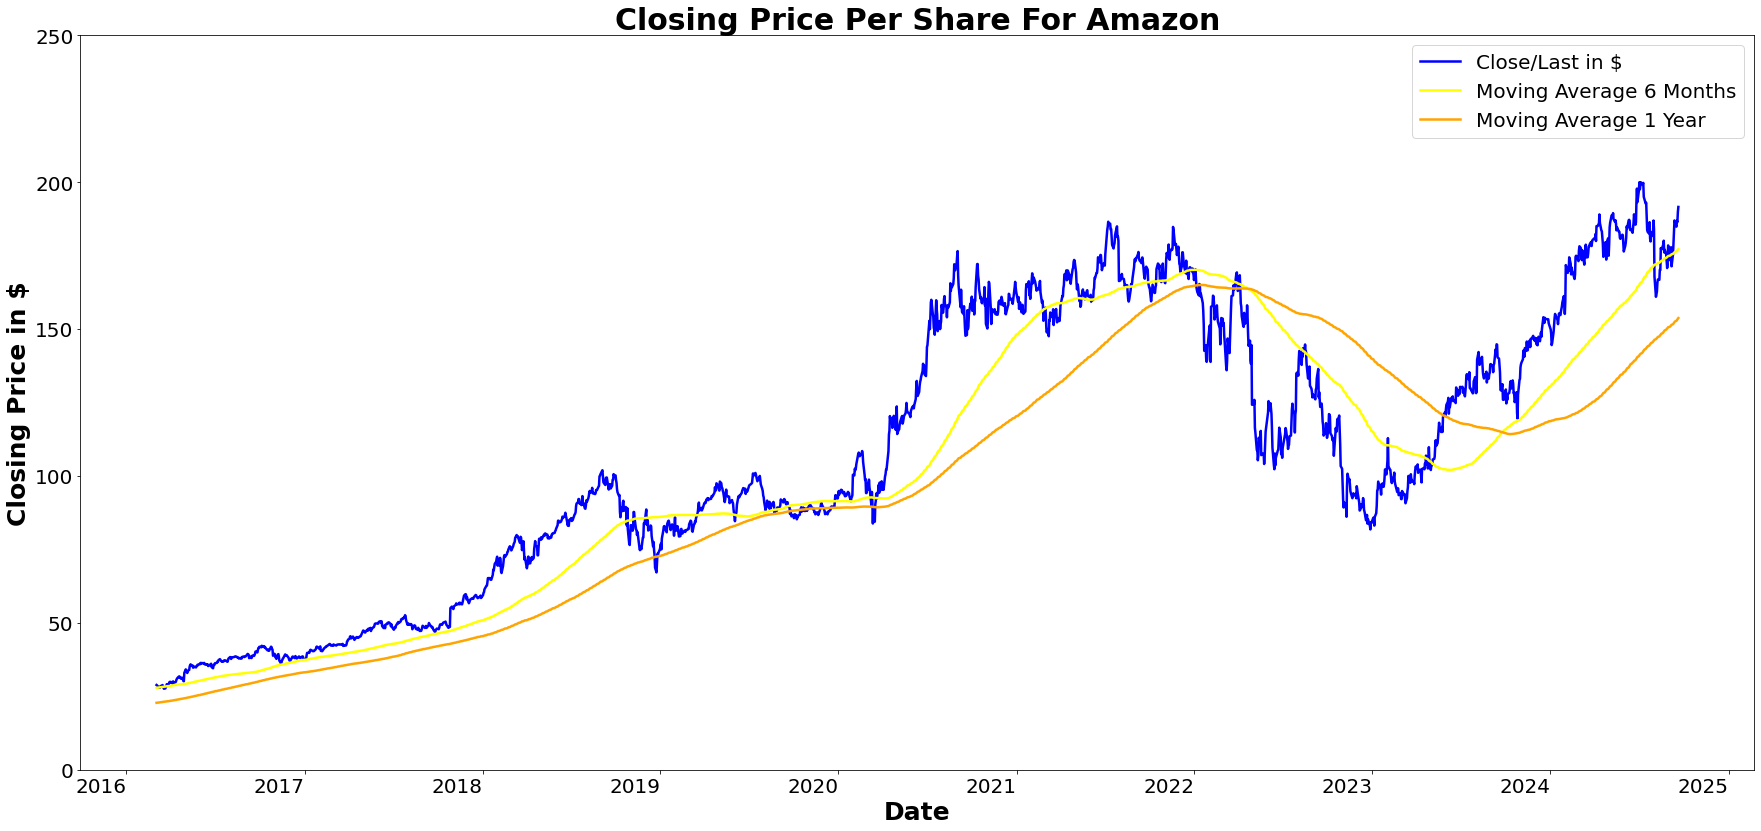

In [18]:
#Using a line chart to graph one year and five year moving averages for all stocks
amazon = plt.figure(figsize=(30,15))
moving_average_amazon_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_amazon_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_amazon_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Amazon', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 300, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

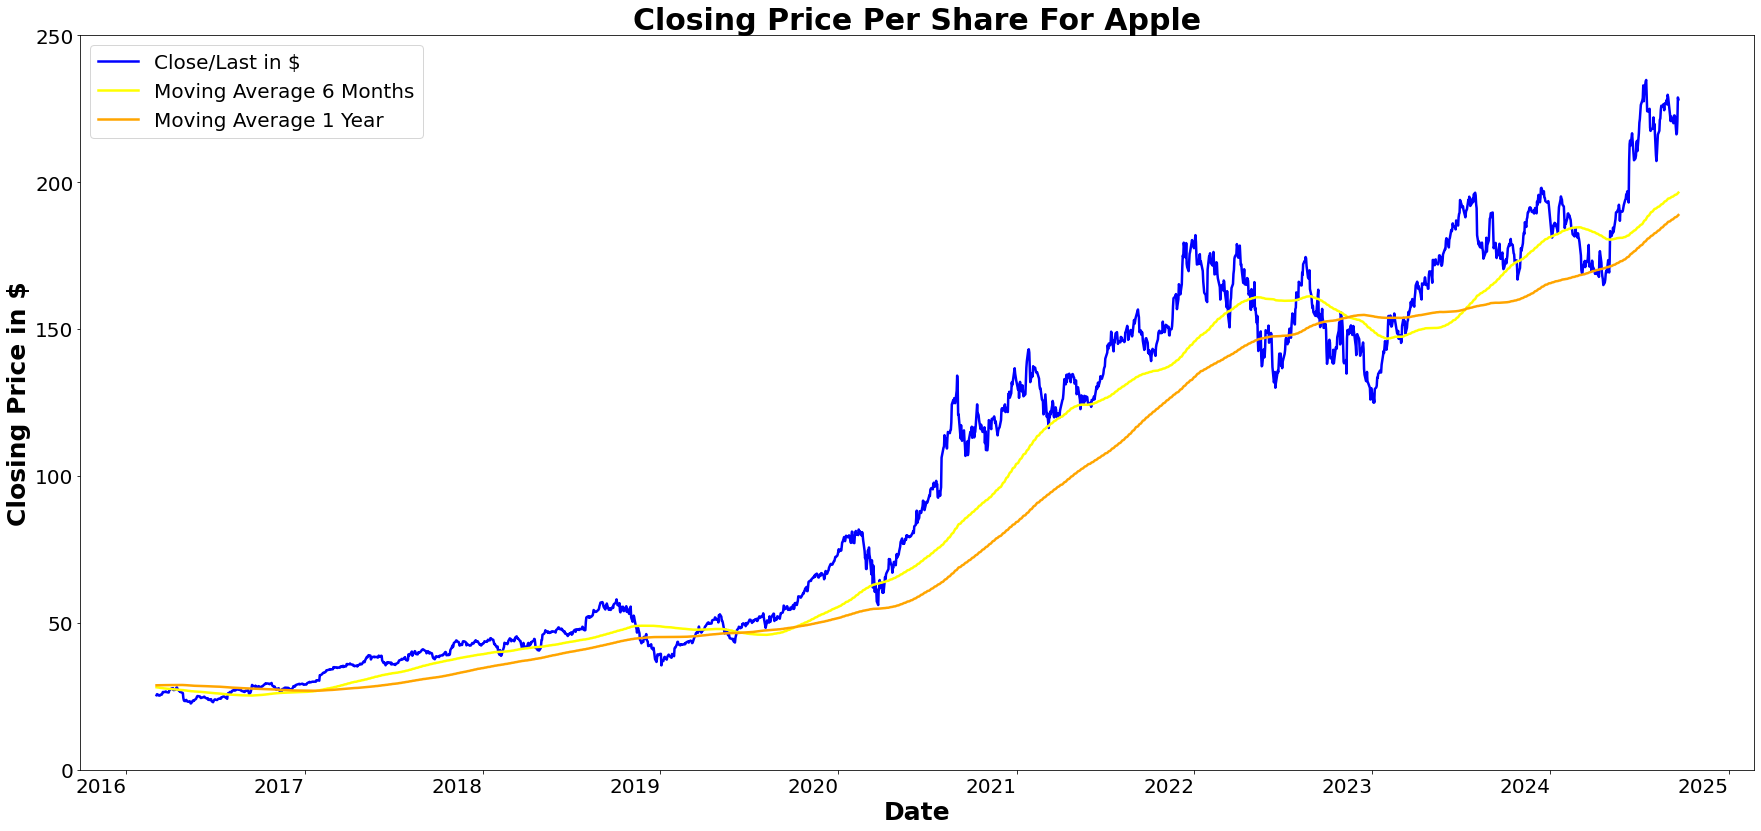

In [19]:
apple = plt.figure(figsize=(30,15))
moving_average_apple_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_apple_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_apple_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Apple', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 300, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

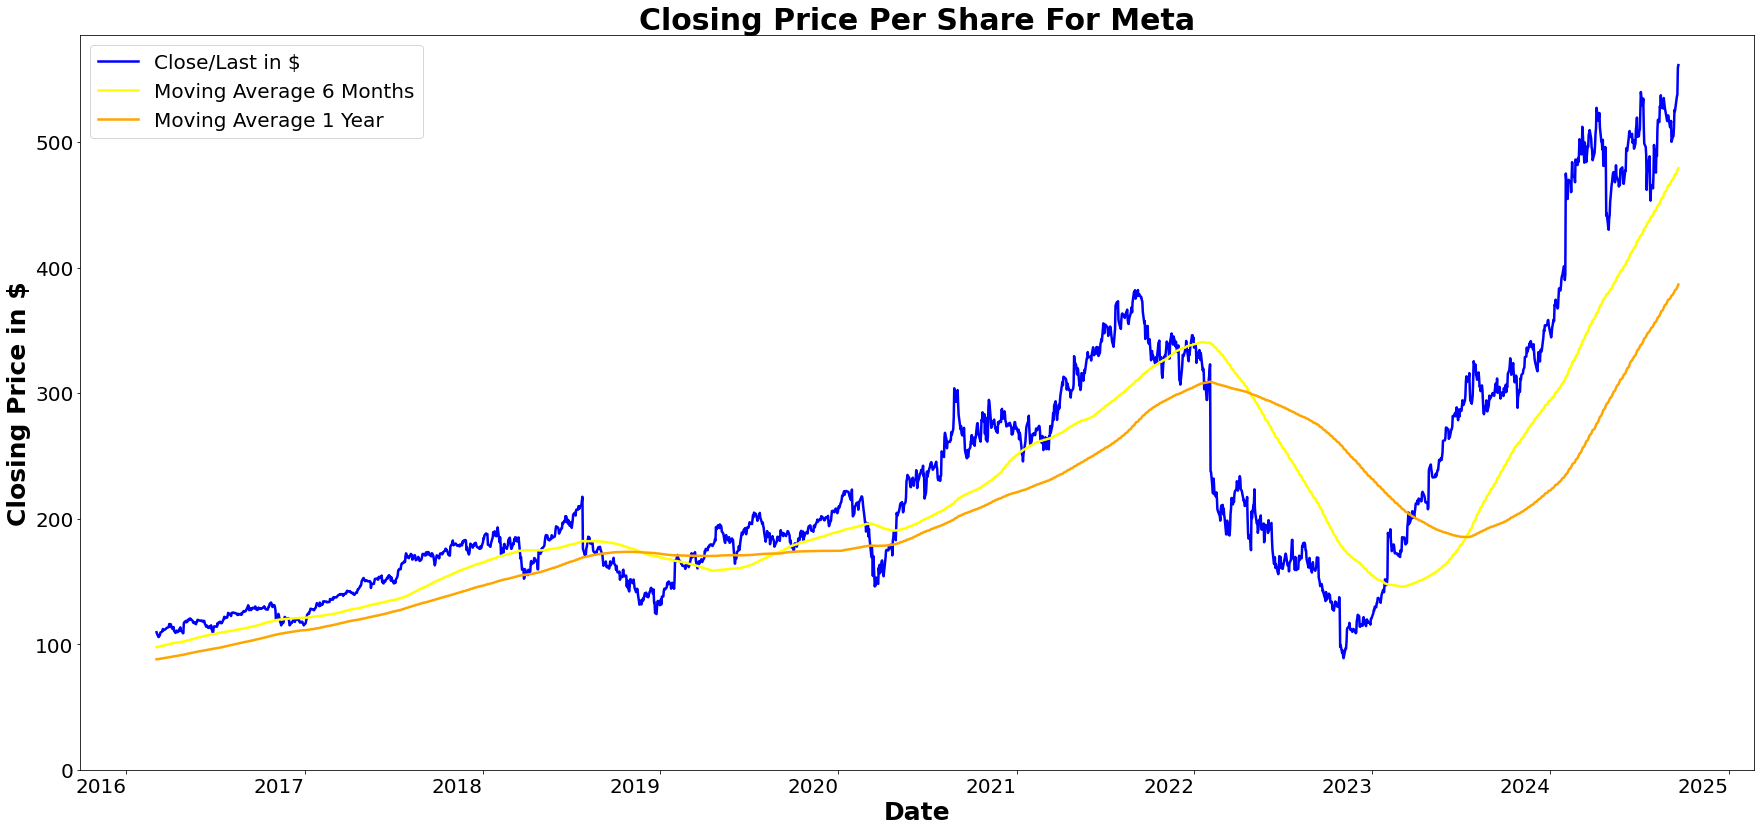

In [20]:
meta = plt.figure(figsize=(30,15))
moving_average_meta_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_meta_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_meta_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Meta', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 600, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

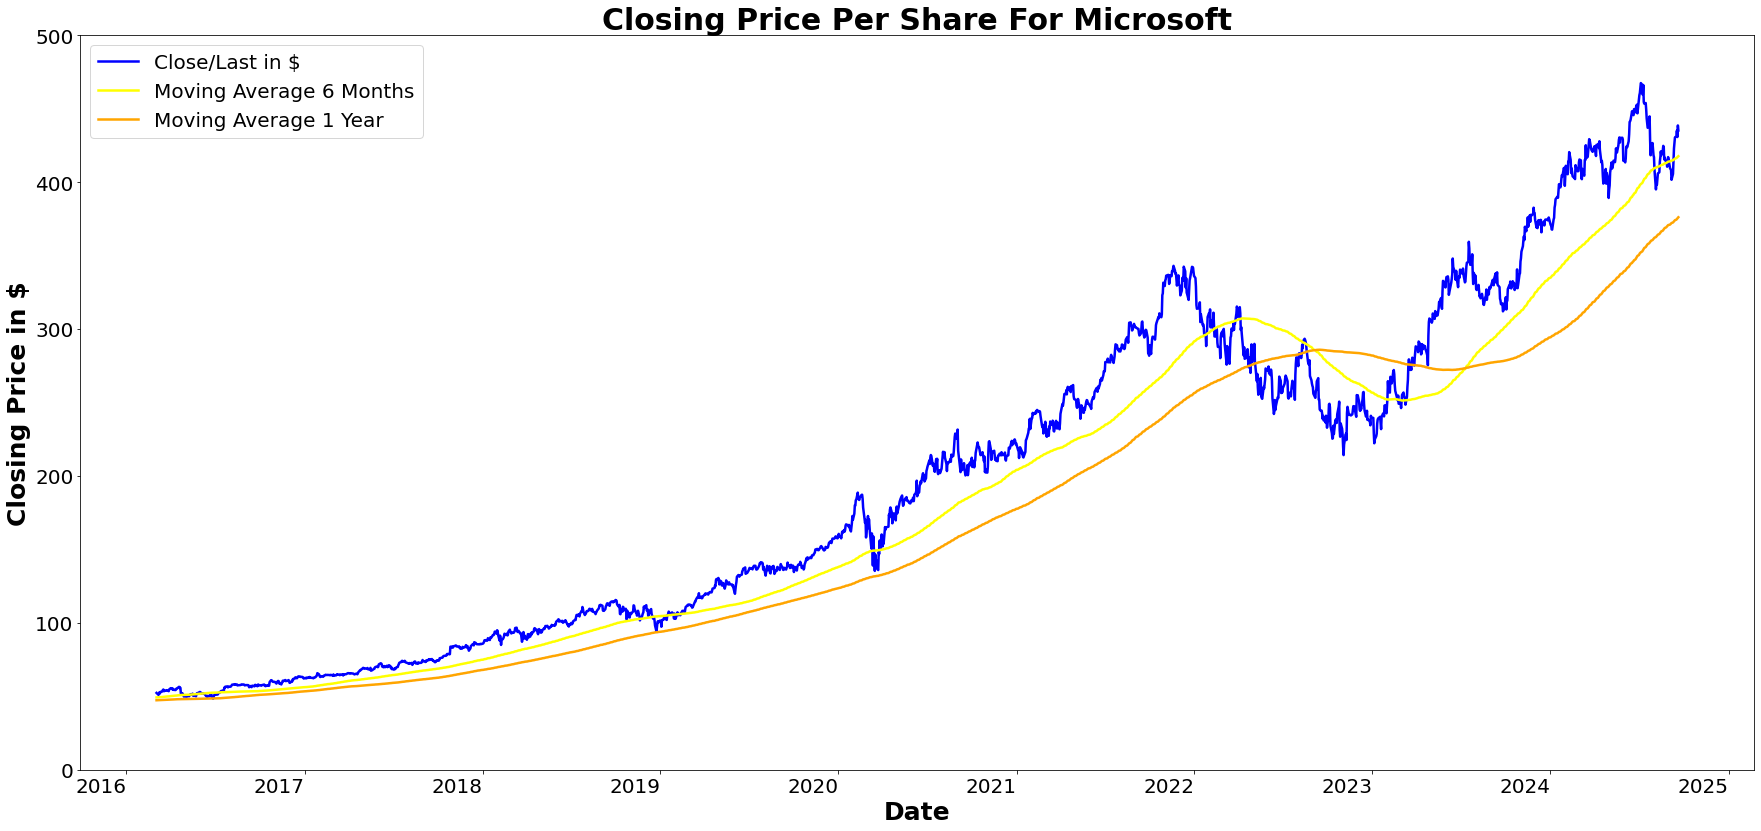

In [21]:
microsoft = plt.figure(figsize=(30,15))
moving_average_microsoft_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_microsoft_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_microsoft_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Microsoft', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 600, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

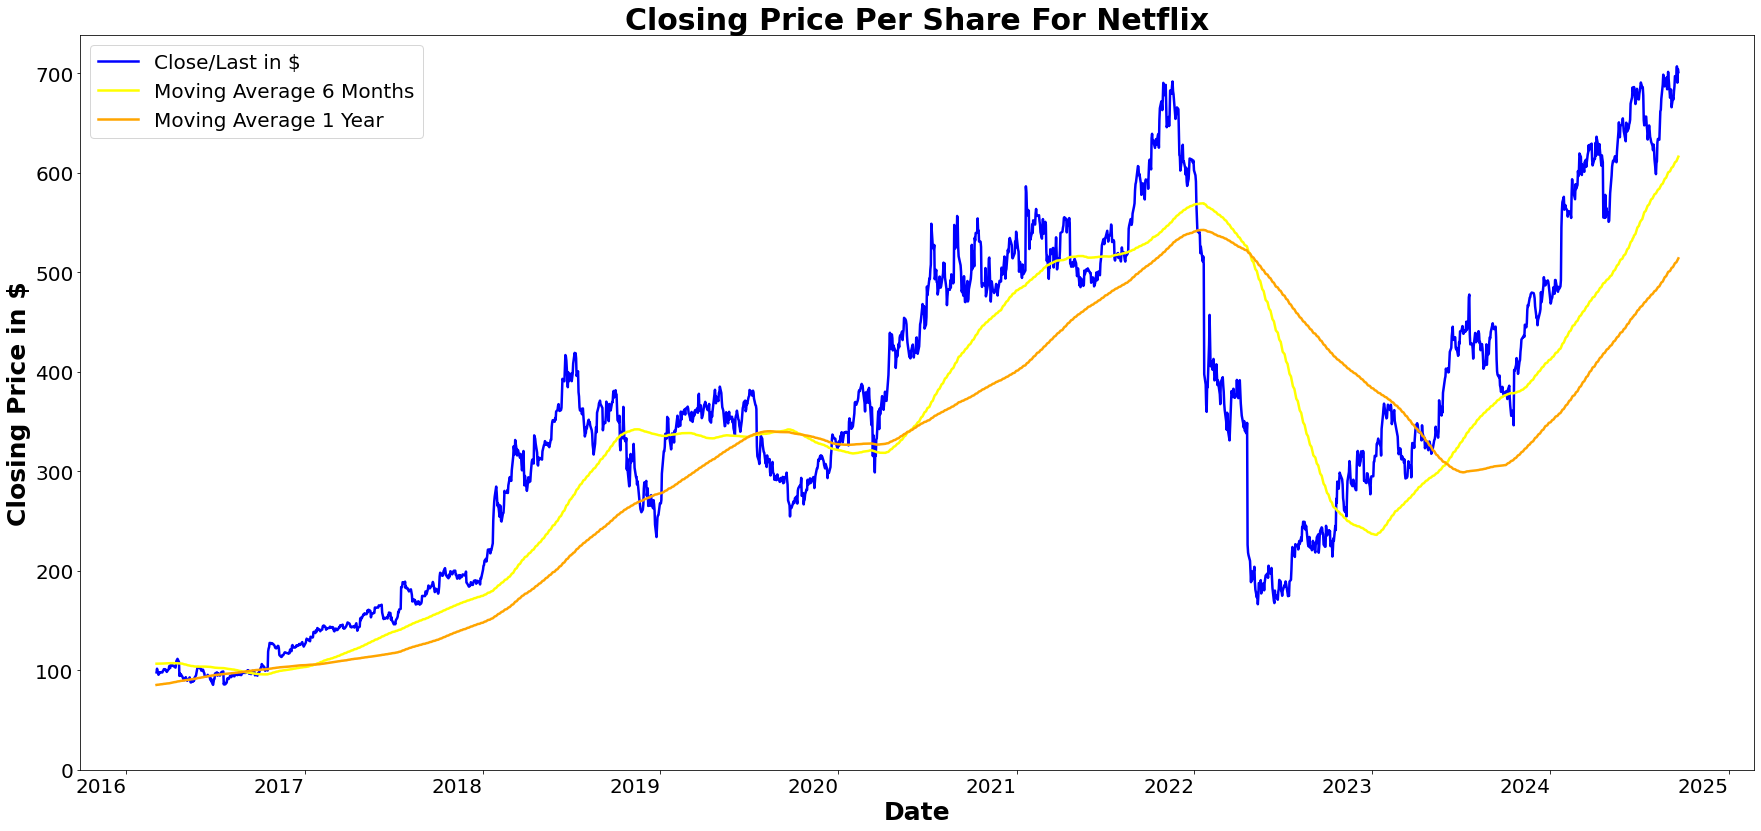

In [22]:
netflix = plt.figure(figsize=(30,15))
moving_average_netflix_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_netflix_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_netflix_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Netflix', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 800, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

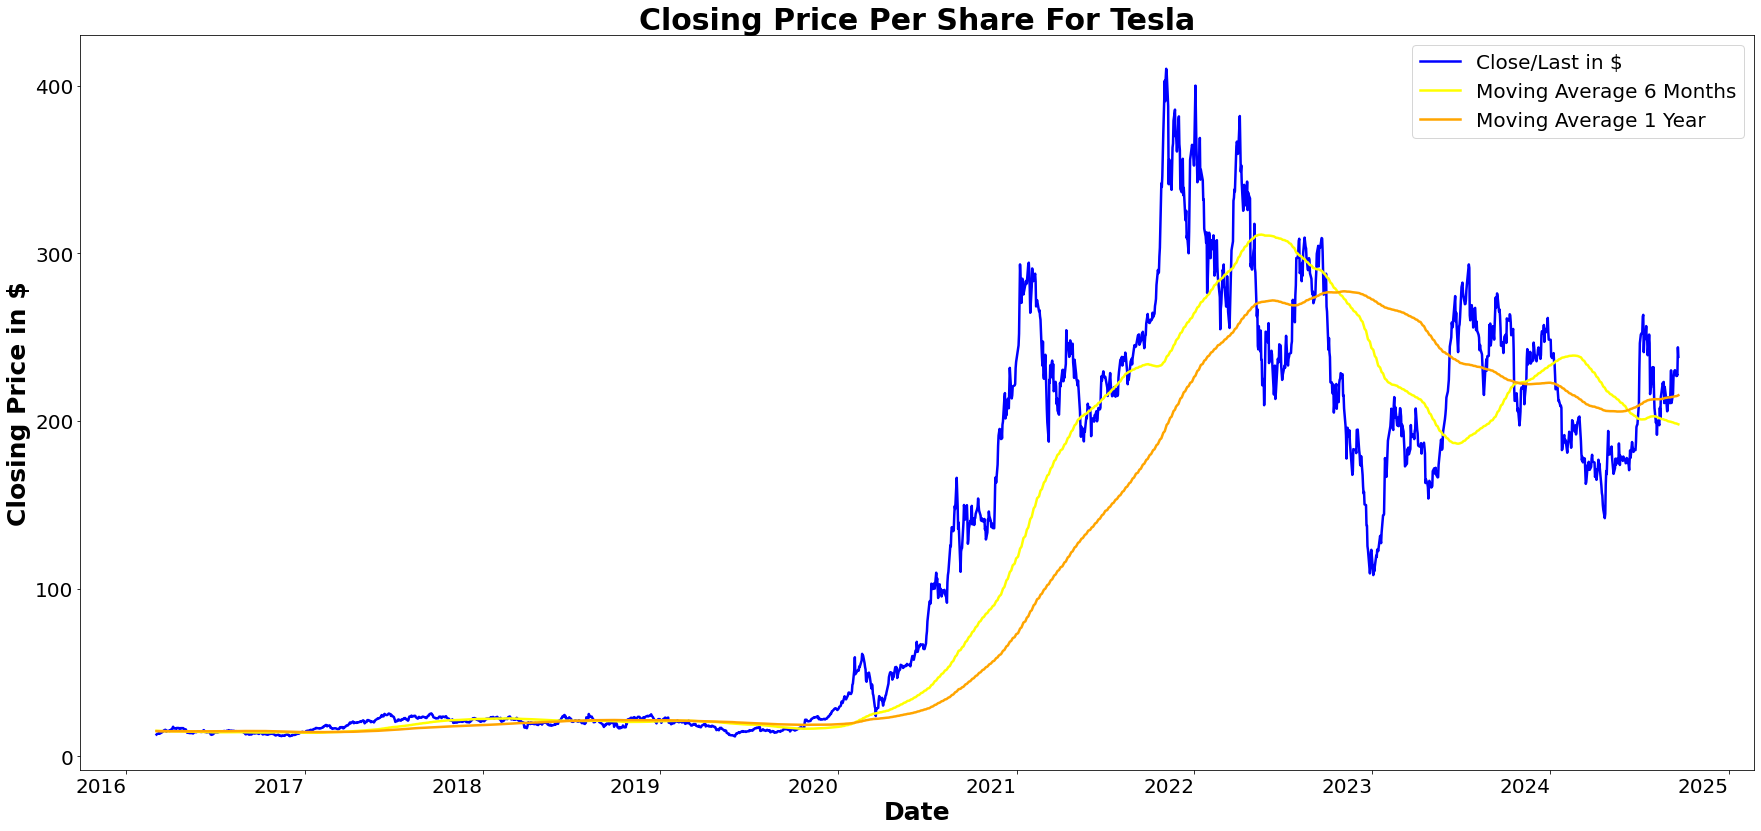

In [23]:
tesla = plt.figure(figsize=(30,15))
moving_average_tesla_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_tesla_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_tesla_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Tesla', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 500, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

In [24]:
shares_volume.savefig(os.path.join(path, 'Visualizations', 'shares_volume.png'))
six_stocks_ten_years.savefig(os.path.join(path, 'Visualizations', 'six_stocks_ten_years.png'))
amazon.savefig(os.path.join(path, 'Visualizations', 'amazon.png'))
apple.savefig(os.path.join(path, 'Visualizations', 'apple.png'))
meta.savefig(os.path.join(path, 'Visualizations', 'meta.png'))
microsoft.savefig(os.path.join(path, 'Visualizations', 'microsoft.png'))
netflix.savefig(os.path.join(path, 'Visualizations', 'netflix.png'))
tesla.savefig(os.path.join(path, 'Visualizations', 'tesla.png'))